In [1]:
from shapely.geometry import Point
#pip install geopandas fiona
#pip install upgrade fiona
#pip install openpypxl
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster


In [2]:
states=gpd.read_file('../data/us-states.json')
states

,id,name,density,geometry
0,01,Alabama,94.650,"POLYGON ((-87.35930 35.00118, -85.60667 34.984..."
1,02,Alaska,1.264,"MULTIPOLYGON (((-131.60202 55.11798, -131.5691..."
2,04,Arizona,57.050,"POLYGON ((-109.04250 37.00026, -109.04798 31.3..."
3,05,Arkansas,56.430,"POLYGON ((-94.47384 36.50186, -90.15254 36.496..."
4,06,California,241.700,"POLYGON ((-123.23326 42.00619, -122.37885 42.0..."
5,08,Colorado,49.330,"POLYGON ((-107.91973 41.00391, -105.72895 40.9..."
6,09,Connecticut,739.100,"POLYGON ((-73.05353 42.03905, -71.79931 42.022..."
7,10,Delaware,464.300,"POLYGON ((-75.41409 39.80446, -75.50720 39.683..."
8,11,District of Columbia,10065.000,"POLYGON ((-77.03526 38.99387, -76.90929 38.895..."
9,12,Florida,353.400,"POLYGON ((-85.49714 30.99754, -85.00421 31.003..."


In [3]:
type(states)

geopandas.geodataframe.GeoDataFrame

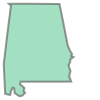

In [4]:
states.loc[0, 'geometry']

<Axes: >

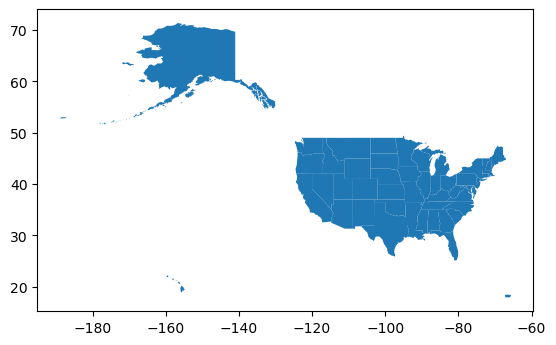

In [5]:
states.plot()

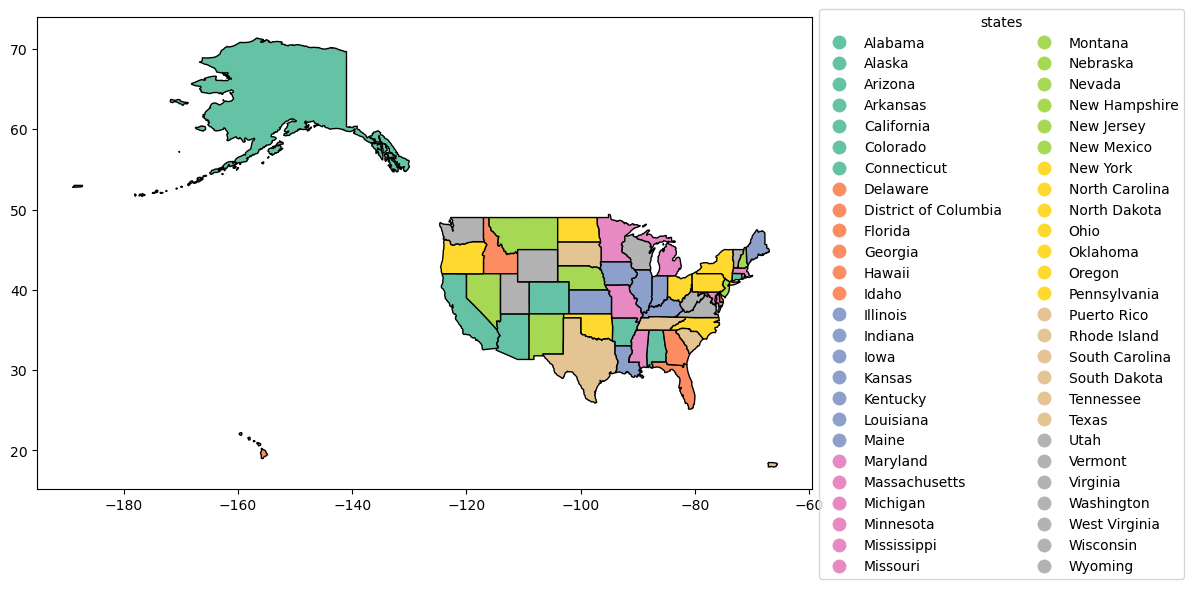

In [6]:
leg_kwds = {'title': 'states', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

st_pl=states.plot(column = 'name', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [7]:
houseprice=pd.read_excel('../data/2024_houseprice_states.xlsx')
houseprice['house_area']=houseprice['house_area'].astype(int)
houseprice

,name,2024_familyhome_value,base _houseprice_Change%,house_area,Year
0,Alabama,277000,114.937759,1566,2024
1,Alaska,396000,164.315353,1095,2024
2,Arizona,462000,191.701245,938,2024
3,Arkansas,260000,107.883817,1668,2024
4,California,869000,360.580913,499,2024
5,Colorado,662000,274.688797,655,2024
6,Connecticut,460000,190.871369,943,2024
7,Delaware,403000,167.219917,1076,2024
8,District of Columbia,1195000,495.850622,363,2024
9,Florida,433000,179.668050,1001,2024


In [8]:
df=pd.merge(states,houseprice,on='name')
df

,id,name,density,geometry,2024_familyhome_value,base _houseprice_Change%,house_area,Year
0,01,Alabama,94.650,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",277000,114.937759,1566,2024
1,02,Alaska,1.264,"MULTIPOLYGON (((-131.60202 55.11798, -131.5691...",396000,164.315353,1095,2024
2,04,Arizona,57.050,"POLYGON ((-109.04250 37.00026, -109.04798 31.3...",462000,191.701245,938,2024
3,05,Arkansas,56.430,"POLYGON ((-94.47384 36.50186, -90.15254 36.496...",260000,107.883817,1668,2024
4,06,California,241.700,"POLYGON ((-123.23326 42.00619, -122.37885 42.0...",869000,360.580913,499,2024
5,08,Colorado,49.330,"POLYGON ((-107.91973 41.00391, -105.72895 40.9...",662000,274.688797,655,2024
6,09,Connecticut,739.100,"POLYGON ((-73.05353 42.03905, -71.79931 42.022...",460000,190.871369,943,2024
7,10,Delaware,464.300,"POLYGON ((-75.41409 39.80446, -75.50720 39.683...",403000,167.219917,1076,2024
8,11,District of Columbia,10065.000,"POLYGON ((-77.03526 38.99387, -76.90929 38.895...",1195000,495.850622,363,2024
9,12,Florida,353.400,"POLYGON ((-85.49714 30.99754, -85.00421 31.003...",433000,179.668050,1001,2024


C:\Users\obuli\AppData\Local\Temp\ipykernel_7972\4094723985.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


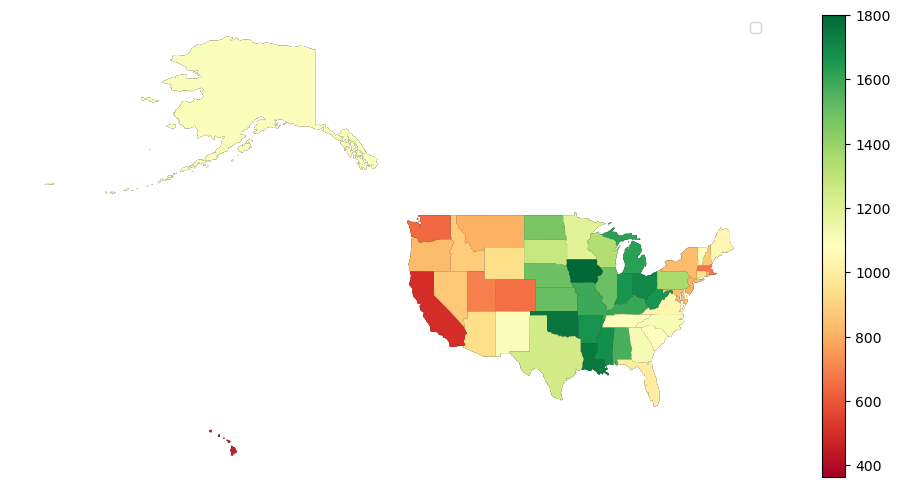

In [9]:
#fig, ax = matplotlib.subplots()
ax = df.plot(figsize = (14,6), color = 'black')
df.plot( ax = ax,cmap='RdYlGn', column = 'house_area',legend = True,);
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
plt.legend()
plt.show();

In [10]:
df1=df

In [11]:
df1['centroid'] = df1.geometry.centroid
df1

C:\Users\obuli\AppData\Local\Temp\ipykernel_7972\3247256593.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df1['centroid'] = df1.geometry.centroid


,id,name,density,geometry,2024_familyhome_value,base _houseprice_Change%,house_area,Year,centroid
0,01,Alabama,94.650,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",277000,114.937759,1566,2024,POINT (-86.82778 32.78991)
1,02,Alaska,1.264,"MULTIPOLYGON (((-131.60202 55.11798, -131.5691...",396000,164.315353,1095,2024,POINT (-152.54269 64.22042)
2,04,Arizona,57.050,"POLYGON ((-109.04250 37.00026, -109.04798 31.3...",462000,191.701245,938,2024,POINT (-111.66330 34.29339)
3,05,Arkansas,56.430,"POLYGON ((-94.47384 36.50186, -90.15254 36.496...",260000,107.883817,1668,2024,POINT (-92.44092 34.89825)
4,06,California,241.700,"POLYGON ((-123.23326 42.00619, -122.37885 42.0...",869000,360.580913,499,2024,POINT (-119.61439 37.25389)
5,08,Colorado,49.330,"POLYGON ((-107.91973 41.00391, -105.72895 40.9...",662000,274.688797,655,2024,POINT (-105.54877 38.99934)
6,09,Connecticut,739.100,"POLYGON ((-73.05353 42.03905, -71.79931 42.022...",460000,190.871369,943,2024,POINT (-72.72786 41.62089)
7,10,Delaware,464.300,"POLYGON ((-75.41409 39.80446, -75.50720 39.683...",403000,167.219917,1076,2024,POINT (-75.49756 38.98269)
8,11,District of Columbia,10065.000,"POLYGON ((-77.03526 38.99387, -76.90929 38.895...",1195000,495.850622,363,2024,POINT (-77.02181 38.89838)
9,12,Florida,353.400,"POLYGON ((-85.49714 30.99754, -85.00421 31.003...",433000,179.668050,1001,2024,POINT (-82.50397 28.65889)


In [12]:
center=df1.geometry.centroid
center

C:\Users\obuli\AppData\Local\Temp\ipykernel_7972\2179514687.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center=df1.geometry.centroid


0      POINT (-86.82778 32.78991)
1     POINT (-152.54269 64.22042)
2     POINT (-111.66330 34.29339)
3      POINT (-92.44092 34.89825)
4     POINT (-119.61439 37.25389)
5     POINT (-105.54877 38.99934)
6      POINT (-72.72786 41.62089)
7      POINT (-75.49756 38.98269)
8      POINT (-77.02181 38.89838)
9      POINT (-82.50397 28.65889)
10     POINT (-83.44647 32.64800)
11    POINT (-156.21763 20.14890)
12    POINT (-114.65982 44.38830)
13     POINT (-89.19574 40.06267)
14     POINT (-86.27067 39.91212)
15     POINT (-93.50040 42.07550)
16     POINT (-98.38277 38.48440)
17     POINT (-85.29211 37.52693)
18     POINT (-91.98856 31.06117)
19     POINT (-69.23245 45.37857)
20     POINT (-76.77058 39.03702)
21     POINT (-71.84341 42.26704)
22     POINT (-85.42558 44.34036)
23     POINT (-94.31124 46.31702)
24     POINT (-89.66350 32.74980)
25     POINT (-92.47744 38.36805)
26    POINT (-109.64686 47.03344)
27     POINT (-99.81051 41.52781)
28    POINT (-116.65436 39.35483)
29     POINT (

In [13]:
area_center=[(i.y,i.x) for i in center]


In [14]:
this_list=[]
for i in center:
    this=i.y,i.x
    this_list.append(this)
this_list

[(32.78990682135675, -86.82778271419518),
 (64.2204189994081, -152.54268949281357),
 (34.29339257053982, -111.6632955488151),
 (34.89824915294627, -92.44092031324395),
 (37.253894888712104, -119.61438873320435),
 (38.99933966538301, -105.54877269595791),
 (41.62089484862288, -72.72785582518726),
 (38.982685337723325, -75.49756138697988),
 (38.89837844615375, -77.02180859388534),
 (28.65889405831818, -82.50397028130844),
 (32.647998651064185, -83.44647345980864),
 (20.14889874154337, -156.21762632280317),
 (44.38830348391967, -114.65981673436995),
 (40.06267347605749, -89.19574045675363),
 (39.91212256329726, -86.27067081277526),
 (42.07550243132768, -93.50039607537926),
 (38.484403669487705, -98.38277207357518),
 (37.52693228579758, -85.29211100755428),
 (31.061170988123184, -91.98856423817978),
 (45.37856800973397, -69.23244781343445),
 (39.03702097199749, -76.77057507690161),
 (42.26704124778922, -71.84340676994377),
 (44.3403584281452, -85.42558192179358),
 (46.317018139687704, -94.

In [15]:
import folium

m = folium.Map(location=area_center[0])
m

In [16]:
for i in range(len(this_list)):
    st_map = folium.Map(location = area_center[i], zoom_start = 12)
st_map

In [17]:
this_list_df=pd.DataFrame(this_list)
this_list_df=this_list_df.rename(columns={0:'lat',1:'lng'})
this_list_df

,lat,lng
0,32.789907,-86.827783
1,64.220419,-152.542689
2,34.293393,-111.663296
3,34.898249,-92.440920
4,37.253895,-119.614389
5,38.999340,-105.548773
6,41.620895,-72.727856
7,38.982685,-75.497561
8,38.898378,-77.021809
9,28.658894,-82.503970


<Axes: >

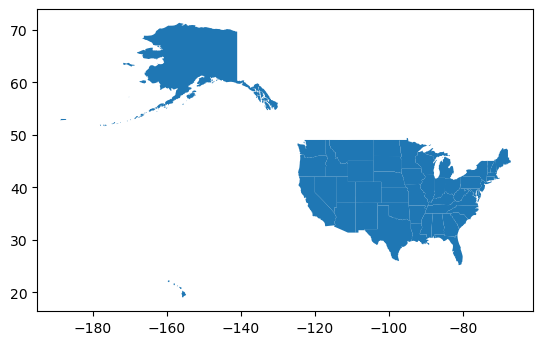

In [18]:
df1.plot()

In [20]:
df1

,id,name,density,geometry,2024_familyhome_value,base _houseprice_Change%,house_area,Year,centroid
0,01,Alabama,94.650,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",277000,114.937759,1566,2024,POINT (-86.82778 32.78991)
1,02,Alaska,1.264,"MULTIPOLYGON (((-131.60202 55.11798, -131.5691...",396000,164.315353,1095,2024,POINT (-152.54269 64.22042)
2,04,Arizona,57.050,"POLYGON ((-109.04250 37.00026, -109.04798 31.3...",462000,191.701245,938,2024,POINT (-111.66330 34.29339)
3,05,Arkansas,56.430,"POLYGON ((-94.47384 36.50186, -90.15254 36.496...",260000,107.883817,1668,2024,POINT (-92.44092 34.89825)
4,06,California,241.700,"POLYGON ((-123.23326 42.00619, -122.37885 42.0...",869000,360.580913,499,2024,POINT (-119.61439 37.25389)
5,08,Colorado,49.330,"POLYGON ((-107.91973 41.00391, -105.72895 40.9...",662000,274.688797,655,2024,POINT (-105.54877 38.99934)
6,09,Connecticut,739.100,"POLYGON ((-73.05353 42.03905, -71.79931 42.022...",460000,190.871369,943,2024,POINT (-72.72786 41.62089)
7,10,Delaware,464.300,"POLYGON ((-75.41409 39.80446, -75.50720 39.683...",403000,167.219917,1076,2024,POINT (-75.49756 38.98269)
8,11,District of Columbia,10065.000,"POLYGON ((-77.03526 38.99387, -76.90929 38.895...",1195000,495.850622,363,2024,POINT (-77.02181 38.89838)
9,12,Florida,353.400,"POLYGON ((-85.49714 30.99754, -85.00421 31.003...",433000,179.668050,1001,2024,POINT (-82.50397 28.65889)


In [21]:
df2=df1
df2['lat']=center.y
df2['lng']=center.x
df2

,id,name,density,geometry,2024_familyhome_value,base _houseprice_Change%,house_area,Year,centroid,lat,lng
0,01,Alabama,94.650,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",277000,114.937759,1566,2024,POINT (-86.82778 32.78991),32.789907,-86.827783
1,02,Alaska,1.264,"MULTIPOLYGON (((-131.60202 55.11798, -131.5691...",396000,164.315353,1095,2024,POINT (-152.54269 64.22042),64.220419,-152.542689
2,04,Arizona,57.050,"POLYGON ((-109.04250 37.00026, -109.04798 31.3...",462000,191.701245,938,2024,POINT (-111.66330 34.29339),34.293393,-111.663296
3,05,Arkansas,56.430,"POLYGON ((-94.47384 36.50186, -90.15254 36.496...",260000,107.883817,1668,2024,POINT (-92.44092 34.89825),34.898249,-92.440920
4,06,California,241.700,"POLYGON ((-123.23326 42.00619, -122.37885 42.0...",869000,360.580913,499,2024,POINT (-119.61439 37.25389),37.253895,-119.614389
5,08,Colorado,49.330,"POLYGON ((-107.91973 41.00391, -105.72895 40.9...",662000,274.688797,655,2024,POINT (-105.54877 38.99934),38.999340,-105.548773
6,09,Connecticut,739.100,"POLYGON ((-73.05353 42.03905, -71.79931 42.022...",460000,190.871369,943,2024,POINT (-72.72786 41.62089),41.620895,-72.727856
7,10,Delaware,464.300,"POLYGON ((-75.41409 39.80446, -75.50720 39.683...",403000,167.219917,1076,2024,POINT (-75.49756 38.98269),38.982685,-75.497561
8,11,District of Columbia,10065.000,"POLYGON ((-77.03526 38.99387, -76.90929 38.895...",1195000,495.850622,363,2024,POINT (-77.02181 38.89838),38.898378,-77.021809
9,12,Florida,353.400,"POLYGON ((-85.49714 30.99754, -85.00421 31.003...",433000,179.668050,1001,2024,POINT (-82.50397 28.65889),28.658894,-82.503970


In [22]:
for i in range(0,len(this_list)):
    st_map = folium.Map(location = (center.y[i],center.x[i]), zoom_start = 12)
    folium.GeoJson(df1).add_to(st_map)
st_map

TypeError: Object of type Point is not JSON serializable

In [ ]:
m = folium.Map(location=area_center[0], zoom_start=5)
point_layer = folium.FeatureGroup(name="Query Search")


In [23]:
df2

,id,name,density,geometry,2024_familyhome_value,base _houseprice_Change%,house_area,Year,centroid,lat,lng
0,01,Alabama,94.650,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",277000,114.937759,1566,2024,POINT (-86.82778 32.78991),32.789907,-86.827783
1,02,Alaska,1.264,"MULTIPOLYGON (((-131.60202 55.11798, -131.5691...",396000,164.315353,1095,2024,POINT (-152.54269 64.22042),64.220419,-152.542689
2,04,Arizona,57.050,"POLYGON ((-109.04250 37.00026, -109.04798 31.3...",462000,191.701245,938,2024,POINT (-111.66330 34.29339),34.293393,-111.663296
3,05,Arkansas,56.430,"POLYGON ((-94.47384 36.50186, -90.15254 36.496...",260000,107.883817,1668,2024,POINT (-92.44092 34.89825),34.898249,-92.440920
4,06,California,241.700,"POLYGON ((-123.23326 42.00619, -122.37885 42.0...",869000,360.580913,499,2024,POINT (-119.61439 37.25389),37.253895,-119.614389
5,08,Colorado,49.330,"POLYGON ((-107.91973 41.00391, -105.72895 40.9...",662000,274.688797,655,2024,POINT (-105.54877 38.99934),38.999340,-105.548773
6,09,Connecticut,739.100,"POLYGON ((-73.05353 42.03905, -71.79931 42.022...",460000,190.871369,943,2024,POINT (-72.72786 41.62089),41.620895,-72.727856
7,10,Delaware,464.300,"POLYGON ((-75.41409 39.80446, -75.50720 39.683...",403000,167.219917,1076,2024,POINT (-75.49756 38.98269),38.982685,-75.497561
8,11,District of Columbia,10065.000,"POLYGON ((-77.03526 38.99387, -76.90929 38.895...",1195000,495.850622,363,2024,POINT (-77.02181 38.89838),38.898378,-77.021809
9,12,Florida,353.400,"POLYGON ((-85.49714 30.99754, -85.00421 31.003...",433000,179.668050,1001,2024,POINT (-82.50397 28.65889),28.658894,-82.503970


In [24]:
m = folium.Map(location=area_center[0], zoom_start=4)
point_layer = folium.FeatureGroup(name="Query Search")
for row_index, row_values in df2.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = f"<strong>States house_price : $</strong>{row_values['2024_familyhome_value']}<br><strong>Comparitive House Area sqft:</strong>{row_values['house_area']}"
    if row_values['house_area']< 900:   
        color="orange"
        icon="home"
    else:
        color="green"
        icon="home"
    icon=folium.Icon(color=color, icon=icon, prefix='fa',alpha=.1) 
    point_layer.add_child(folium.Marker(location=loc,
                                        radius=10,icon=icon,popup=pop) ).add_to(m)
                          
m.add_child(point_layer)
m.add_child(folium.LayerControl())  

m.save('../maps/houseprice2024.html')
m

In [25]:


# Example: Create a list of coordinates for area center
area_center = [(32.7899, -86.8278), (64.2204, -152.5427)]  # Replace with actual coordinates
this_list = range(len(area_center))  # Example: range of areas to iterate over

# Initialize the map (create one map object to add all markers to)
st_map = folium.Map(location = area_center[0], zoom_start = 12)

# Adding GeoJson to the map (assuming df1 has 'lat' and 'lng' columns)
gdf = gpd.GeoDataFrame(df1, geometry=gpd.points_from_xy(df1['lng'], df1['lat']))
geojson = gdf.to_json()  # Converts GeoDataFrame to GeoJSON
folium.GeoJson(geojson).add_to(st_map)

# Add markers for each row in df1
for row_index, row_values in df1.iterrows():
    loc = [row_values['lat'], row_values['lng']]  # Ensure lat and lng columns exist
    pop = str(row_values['route'])  # Popup text from 'route' column
    icon = folium.Icon(color="blue", icon="bus", prefix='fa')  # Customize icon

    marker = folium.Marker(location=loc, popup=pop, icon=icon)
    marker.add_to(st_map)

# Save the map to an HTML file
st_map.save('../maps/m_3.html')

# Optionally, display the map (in Jupyter or IPython)
st_map


TypeError: Object of type Point is not JSON serializable